
# <span style="color:BLUE">  Step 1: Cleaning of lending club datasets

In this notebook, we start by importing and cleaning the LendingClub dataset, then we will prepare the cleaned `.csv` file for data analysis. 

**Output from this notebook**: A cleaned .csv file for EDA and model training



**1. Import the data and important libraries**

In [147]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

# Define file path
local_file_path = r"/Users/hisay/Desktop/Courses/DSFinance/Data_Science_in_Finance_Resources" #in HISAY PC

file_path = "python-material/data/1-raw/lending-club-2007-2020Q3"
file_name = "Loan_status_2007-2020Q3-100ksample.csv"
full_path = os.path.join(local_file_path,file_path,file_name)

# Load dataset
df = pd.read_csv(full_path)

**Display the details of the dataframe:**

In [149]:
# Show number of features
print("---------------------------------------------\n")
print(f"Number of features (columns): {df.shape[1]}\n")
# Show feature names and their types
print("---------------------------------------------\n")
print("Feature names and data types:\n")
print(df.dtypes)
print("---------------------------------------------\n")

# Optional: count of data types
print("Summary of data types:\n")
print(df.dtypes.value_counts())
print("---------------------------------------------\n")

---------------------------------------------

Number of features (columns): 143

---------------------------------------------

Feature names and data types:

Unnamed: 0.1                                    int64
Unnamed: 0                                      int64
id                                              int64
loan_amnt                                     float64
funded_amnt                                   float64
                                               ...   
hardship_loan_status                           object
orig_projected_additional_accrued_interest    float64
hardship_payoff_balance_amount                float64
hardship_last_payment_amount                  float64
debt_settlement_flag                           object
Length: 143, dtype: object
---------------------------------------------

Summary of data types:

float64    106
object      34
int64        3
Name: count, dtype: int64
---------------------------------------------



In [150]:
#Display the data dictionary -> Understand the labelled column 
local_file_path = r"/Users/hisay/Desktop/Courses/DSFinance/Data_Science_in_Finance_Resources" #in HISAY PC
file_path = "python-material/data/1-raw/lending-club-2007-2020Q3"
file_name = "LCDataDictionary.xlsx"
file_path = os.path.join(local_file_path,file_path,file_name)
df_dictionary = pd.read_excel(file_path)

# Convert to Markdown format
from IPython.display import Markdown
markdown_table = df_dictionary.to_markdown(index=False)  
print("********************************************************\n")
print("Here is the dictionary for the list of the variables: \n")
print("-------------------------------------------------------\n")
display(Markdown(markdown_table))  # Display as Markdown 

********************************************************

Here is the dictionary for the list of the variables: 

-------------------------------------------------------



| LoanStatNew                                | Description                                                                                                                                                                                                                               |
|:-------------------------------------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| acc_now_delinq                             | The number of accounts on which the borrower is now delinquent.                                                                                                                                                                           |
| acc_open_past_24mths                       | Number of trades opened in past 24 months.                                                                                                                                                                                                |
| addr_state                                 | The state provided by the borrower in the loan application                                                                                                                                                                                |
| all_util                                   | Balance to credit limit on all trades                                                                                                                                                                                                     |
| annual_inc                                 | The self-reported annual income provided by the borrower during registration.                                                                                                                                                             |
| annual_inc_joint                           | The combined self-reported annual income provided by the co-borrowers during registration                                                                                                                                                 |
| application_type                           | Indicates whether the loan is an individual application or a joint application with two co-borrowers                                                                                                                                      |
| avg_cur_bal                                | Average current balance of all accounts                                                                                                                                                                                                   |
| bc_open_to_buy                             | Total open to buy on revolving bankcards.                                                                                                                                                                                                 |
| bc_util                                    | Ratio of total current balance to high credit/credit limit for all bankcard accounts.                                                                                                                                                     |
| chargeoff_within_12_mths                   | Number of charge-offs within 12 months                                                                                                                                                                                                    |
| collection_recovery_fee                    | post charge off collection fee                                                                                                                                                                                                            |
| collections_12_mths_ex_med                 | Number of collections in 12 months excluding medical collections                                                                                                                                                                          |
| delinq_2yrs                                | The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years                                                                                                                              |
| delinq_amnt                                | The past-due amount owed for the accounts on which the borrower is now delinquent.                                                                                                                                                        |
| desc                                       | Loan description provided by the borrower                                                                                                                                                                                                 |
| dti                                        | A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.                                  |
| dti_joint                                  | A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income                        |
| earliest_cr_line                           | The month the borrower's earliest reported credit line was opened                                                                                                                                                                         |
| emp_length                                 | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.                                                                                                         |
| emp_title                                  | The job title supplied by the Borrower when applying for the loan.*                                                                                                                                                                       |
| fico_range_high                            | The upper boundary range the borrower’s FICO at loan origination belongs to.                                                                                                                                                              |
| fico_range_low                             | The lower boundary range the borrower’s FICO at loan origination belongs to.                                                                                                                                                              |
| funded_amnt                                | The total amount committed to that loan at that point in time.                                                                                                                                                                            |
| funded_amnt_inv                            | The total amount committed by investors for that loan at that point in time.                                                                                                                                                              |
| grade                                      | LC assigned loan grade                                                                                                                                                                                                                    |
| home_ownership                             | The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER                                                                                     |
| id                                         | A unique LC assigned ID for the loan listing.                                                                                                                                                                                             |
| il_util                                    | Ratio of total current balance to high credit/credit limit on all install acct                                                                                                                                                            |
| initial_list_status                        | The initial listing status of the loan. Possible values are – W, F                                                                                                                                                                        |
| inq_fi                                     | Number of personal finance inquiries                                                                                                                                                                                                      |
| inq_last_12m                               | Number of credit inquiries in past 12 months                                                                                                                                                                                              |
| inq_last_6mths                             | The number of inquiries in past 6 months (excluding auto and mortgage inquiries)                                                                                                                                                          |
| installment                                | The monthly payment owed by the borrower if the loan originates.                                                                                                                                                                          |
| int_rate                                   | Interest Rate on the loan                                                                                                                                                                                                                 |
| issue_d                                    | The month which the loan was funded                                                                                                                                                                                                       |
| last_credit_pull_d                         | The most recent month LC pulled credit for this loan                                                                                                                                                                                      |
| last_fico_range_high                       | The upper boundary range the borrower’s last FICO pulled belongs to.                                                                                                                                                                      |
| last_fico_range_low                        | The lower boundary range the borrower’s last FICO pulled belongs to.                                                                                                                                                                      |
| last_pymnt_amnt                            | Last total payment amount received                                                                                                                                                                                                        |
| last_pymnt_d                               | Last month payment was received                                                                                                                                                                                                           |
| loan_amnt                                  | The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.                                                              |
| loan_status                                | Current status of the loan                                                                                                                                                                                                                |
| max_bal_bc                                 | Maximum current balance owed on all revolving accounts                                                                                                                                                                                    |
| member_id                                  | A unique LC assigned Id for the borrower member.                                                                                                                                                                                          |
| mo_sin_old_il_acct                         | Months since oldest bank installment account opened                                                                                                                                                                                       |
| mo_sin_old_rev_tl_op                       | Months since oldest revolving account opened                                                                                                                                                                                              |
| mo_sin_rcnt_rev_tl_op                      | Months since most recent revolving account opened                                                                                                                                                                                         |
| mo_sin_rcnt_tl                             | Months since most recent account opened                                                                                                                                                                                                   |
| mort_acc                                   | Number of mortgage accounts.                                                                                                                                                                                                              |
| mths_since_last_delinq                     | The number of months since the borrower's last delinquency.                                                                                                                                                                               |
| mths_since_last_major_derog                | Months since most recent 90-day or worse rating                                                                                                                                                                                           |
| mths_since_last_record                     | The number of months since the last public record.                                                                                                                                                                                        |
| mths_since_rcnt_il                         | Months since most recent installment accounts opened                                                                                                                                                                                      |
| mths_since_recent_bc                       | Months since most recent bankcard account opened.                                                                                                                                                                                         |
| mths_since_recent_bc_dlq                   | Months since most recent bankcard delinquency                                                                                                                                                                                             |
| mths_since_recent_inq                      | Months since most recent inquiry.                                                                                                                                                                                                         |
| mths_since_recent_revol_delinq             | Months since most recent revolving delinquency.                                                                                                                                                                                           |
| next_pymnt_d                               | Next scheduled payment date                                                                                                                                                                                                               |
| num_accts_ever_120_pd                      | Number of accounts ever 120 or more days past due                                                                                                                                                                                         |
| num_actv_bc_tl                             | Number of currently active bankcard accounts                                                                                                                                                                                              |
| num_actv_rev_tl                            | Number of currently active revolving trades                                                                                                                                                                                               |
| num_bc_sats                                | Number of satisfactory bankcard accounts                                                                                                                                                                                                  |
| num_bc_tl                                  | Number of bankcard accounts                                                                                                                                                                                                               |
| num_il_tl                                  | Number of installment accounts                                                                                                                                                                                                            |
| num_op_rev_tl                              | Number of open revolving accounts                                                                                                                                                                                                         |
| num_rev_accts                              | Number of revolving accounts                                                                                                                                                                                                              |
| num_rev_tl_bal_gt_0                        | Number of revolving trades with balance >0                                                                                                                                                                                                |
| num_sats                                   | Number of satisfactory accounts                                                                                                                                                                                                           |
| num_tl_120dpd_2m                           | Number of accounts currently 120 days past due (updated in past 2 months)                                                                                                                                                                 |
| num_tl_30dpd                               | Number of accounts currently 30 days past due (updated in past 2 months)                                                                                                                                                                  |
| num_tl_90g_dpd_24m                         | Number of accounts 90 or more days past due in last 24 months                                                                                                                                                                             |
| num_tl_op_past_12m                         | Number of accounts opened in past 12 months                                                                                                                                                                                               |
| open_acc                                   | The number of open credit lines in the borrower's credit file.                                                                                                                                                                            |
| open_acc_6m                                | Number of open trades in last 6 months                                                                                                                                                                                                    |
| open_il_12m                                | Number of installment accounts opened in past 12 months                                                                                                                                                                                   |
| open_il_24m                                | Number of installment accounts opened in past 24 months                                                                                                                                                                                   |
| open_act_il                                | Number of currently active installment trades                                                                                                                                                                                             |
| open_rv_12m                                | Number of revolving trades opened in past 12 months                                                                                                                                                                                       |
| open_rv_24m                                | Number of revolving trades opened in past 24 months                                                                                                                                                                                       |
| out_prncp                                  | Remaining outstanding principal for total amount funded                                                                                                                                                                                   |
| out_prncp_inv                              | Remaining outstanding principal for portion of total amount funded by investors                                                                                                                                                           |
| pct_tl_nvr_dlq                             | Percent of trades never delinquent                                                                                                                                                                                                        |
| percent_bc_gt_75                           | Percentage of all bankcard accounts > 75% of limit.                                                                                                                                                                                       |
| policy_code                                | publicly available policy_code=1                                                                                                                                                                                                          |
|                                            | new products not publicly available policy_code=2                                                                                                                                                                                         |
| pub_rec                                    | Number of derogatory public records                                                                                                                                                                                                       |
| pub_rec_bankruptcies                       | Number of public record bankruptcies                                                                                                                                                                                                      |
| purpose                                    | A category provided by the borrower for the loan request.                                                                                                                                                                                 |
| pymnt_plan                                 | Indicates if a payment plan has been put in place for the loan                                                                                                                                                                            |
| recoveries                                 | post charge off gross recovery                                                                                                                                                                                                            |
| revol_bal                                  | Total credit revolving balance                                                                                                                                                                                                            |
| revol_util                                 | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.                                                                                                                |
| sub_grade                                  | LC assigned loan subgrade                                                                                                                                                                                                                 |
| tax_liens                                  | Number of tax liens                                                                                                                                                                                                                       |
| term                                       | The number of payments on the loan. Values are in months and can be either 36 or 60.                                                                                                                                                      |
| title                                      | The loan title provided by the borrower                                                                                                                                                                                                   |
| tot_coll_amt                               | Total collection amounts ever owed                                                                                                                                                                                                        |
| tot_cur_bal                                | Total current balance of all accounts                                                                                                                                                                                                     |
| tot_hi_cred_lim                            | Total high credit/credit limit                                                                                                                                                                                                            |
| total_acc                                  | The total number of credit lines currently in the borrower's credit file                                                                                                                                                                  |
| total_bal_ex_mort                          | Total credit balance excluding mortgage                                                                                                                                                                                                   |
| total_bal_il                               | Total current balance of all installment accounts                                                                                                                                                                                         |
| total_bc_limit                             | Total bankcard high credit/credit limit                                                                                                                                                                                                   |
| total_cu_tl                                | Number of finance trades                                                                                                                                                                                                                  |
| total_il_high_credit_limit                 | Total installment high credit/credit limit                                                                                                                                                                                                |
| total_pymnt                                | Payments received to date for total amount funded                                                                                                                                                                                         |
| total_pymnt_inv                            | Payments received to date for portion of total amount funded by investors                                                                                                                                                                 |
| total_rec_int                              | Interest received to date                                                                                                                                                                                                                 |
| total_rec_late_fee                         | Late fees received to date                                                                                                                                                                                                                |
| total_rec_prncp                            | Principal received to date                                                                                                                                                                                                                |
| total_rev_hi_lim                           | Total revolving high credit/credit limit                                                                                                                                                                                                  |
| url                                        | URL for the LC page with listing data.                                                                                                                                                                                                    |
| verification_status                        | Indicates if income was verified by LC, not verified, or if the income source was verified                                                                                                                                                |
| verified_status_joint                      | Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified                                                                                                                        |
| zip_code                                   | The first 3 numbers of the zip code provided by the borrower in the loan application.                                                                                                                                                     |
| revol_bal_joint                            | Sum of revolving credit balance of the co-borrowers, net of duplicate balances                                                                                                                                                            |
| sec_app_fico_range_low                     | FICO range (high) for the secondary applicant                                                                                                                                                                                             |
| sec_app_fico_range_high                    | FICO range (low) for the secondary applicant                                                                                                                                                                                              |
| sec_app_earliest_cr_line                   | Earliest credit line at time of application for the secondary applicant                                                                                                                                                                   |
| sec_app_inq_last_6mths                     | Credit inquiries in the last 6 months at time of application for the secondary applicant                                                                                                                                                  |
| sec_app_mort_acc                           | Number of mortgage accounts at time of application for the secondary applicant                                                                                                                                                            |
| sec_app_open_acc                           | Number of open trades at time of application for the secondary applicant                                                                                                                                                                  |
| sec_app_revol_util                         | Ratio of total current balance to high credit/credit limit for all revolving accounts                                                                                                                                                     |
| sec_app_open_act_il                        | Number of currently active installment trades at time of application for the secondary applicant                                                                                                                                          |
| sec_app_num_rev_accts                      | Number of revolving accounts at time of application for the secondary applicant                                                                                                                                                           |
| sec_app_chargeoff_within_12_mths           | Number of charge-offs within last 12 months at time of application for the secondary applicant                                                                                                                                            |
| sec_app_collections_12_mths_ex_med         | Number of collections within last 12 months excluding medical collections at time of application for the secondary applicant                                                                                                              |
| sec_app_mths_since_last_major_derog        | Months since most recent 90-day or worse rating at time of application for the secondary applicant                                                                                                                                        |
| hardship_flag                              | Flags whether or not the borrower is on a hardship plan                                                                                                                                                                                   |
| hardship_type                              | Describes the hardship plan offering                                                                                                                                                                                                      |
| hardship_reason                            | Describes the reason the hardship plan was offered                                                                                                                                                                                        |
| hardship_status                            | Describes if the hardship plan is active, pending, canceled, completed, or broken                                                                                                                                                         |
| deferral_term                              | Amount of months that the borrower is expected to pay less than the contractual monthly payment amount due to a hardship plan                                                                                                             |
| hardship_amount                            | The interest payment that the borrower has committed to make each month while they are on a hardship plan                                                                                                                                 |
| hardship_start_date                        | The start date of the hardship plan period                                                                                                                                                                                                |
| hardship_end_date                          | The end date of the hardship plan period                                                                                                                                                                                                  |
| payment_plan_start_date                    | The day the first hardship plan payment is due. For example, if a borrower has a hardship plan period of 3 months, the start date is the start of the three-month period in which the borrower is allowed to make interest-only payments. |
| hardship_length                            | The number of months the borrower will make smaller payments than normally obligated due to a hardship plan                                                                                                                               |
| hardship_dpd                               | Account days past due as of the hardship plan start date                                                                                                                                                                                  |
| hardship_loan_status                       | Loan Status as of the hardship plan start date                                                                                                                                                                                            |
| orig_projected_additional_accrued_interest | The original projected additional interest amount that will accrue for the given hardship payment plan as of the Hardship Start Date. This field will be null if the borrower has broken their hardship payment plan.                     |
| hardship_payoff_balance_amount             | The payoff balance amount as of the hardship plan start date                                                                                                                                                                              |
| hardship_last_payment_amount               | The last payment amount as of the hardship plan start date                                                                                                                                                                                |
| disbursement_method                        | The method by which the borrower receives their loan. Possible values are: CASH, DIRECT_PAY                                                                                                                                               |
| debt_settlement_flag                       | Flags whether or not the borrower, who has charged-off, is working with a debt-settlement company.                                                                                                                                        |
| debt_settlement_flag_date                  | The most recent date that the Debt_Settlement_Flag has been set                                                                                                                                                                           |
| settlement_status                          | The status of the borrower’s settlement plan. Possible values are: COMPLETE, ACTIVE, BROKEN, CANCELLED, DENIED, DRAFT                                                                                                                     |
| settlement_date                            | The date that the borrower agrees to the settlement plan                                                                                                                                                                                  |
| settlement_amount                          | The loan amount that the borrower has agreed to settle for                                                                                                                                                                                |
| settlement_percentage                      | The settlement amount as a percentage of the payoff balance amount on the loan                                                                                                                                                            |
| settlement_term                            | The number of months that the borrower will be on the settlement plan                                                                                                                                                                     |
| nan                                        | nan                                                                                                                                                                                                                                       |
| nan                                        | * Employer Title replaces Employer Name for all loans listed after 9/23/2013                                                                                                                                                              |

**2. List of important variables**

The dataset contains a total of 143 features, which is quite large for effective analysis. Including all of them may lead to **overfitting** and **increased computational costs** without significantly improving model performance. Based on our problem statement, we have selected 21 key features that are most relevant for performing Exploratory Data Analysis (EDA). These selected features offer valuable insights into patterns and trends that influence loan approval decisions. 

The variables are chosen based on borader categorization noted for loan aproval. They are -- **Borrower's credit history**, **Financial Stability/Collateral**, **Employment and Income Verification**, **Loan Performance Metrics**, **Existing Debt and Liabilities** and **Loan Purpose and Type**

**Borrower's credit history**
- `fico_range_high and fico_range_low` – Borrower’s FICO scores
- `pub_rec_bankruptcies` – Number of bankruptcies recorded. 

**Financial Stability/Collateral**
- `annual_inc` – Borrower’s self-reported annual income. 
- `dti` – Debt-to-income ratio (lower is better).        
- `home_ownership` – Indicates if the borrower owns a home (MORTGAGE, RENT, OWN).
- `loan_amnt` – The amount of loan requested.             
- `installment` – The monthly payment amount.            

**Employment and Income Verification**
- `emp_length` – Employment length in years (stability in employment matters).
- `verification_status` – Whether the income is verified (Verified, Source Verified, Not Verified).
- `application_type` - Individual application or a joint application 

**Loan Performance Metrics**
- `loan_status` – Current loan status (Fully Paid, Charged Off, Late, Default). 

**Existing Debt and Liabilities**
- `total_acc` – Total number of credit lines.
- `open_acc` – Number of open credit lines.
- `max_bal_bc` – Maximum current balance on all revolving accounts.
- `bc_util` – Ratio of total balance to credit limit for bankcard accounts.
- `pub_rec_bankruptcies`- Number of public record bankruptcies


**Loan Purpose and Type**
- `purpose` – The reason for taking the loan (e.g., credit card debt consolidation, home improvement).
- `term` – Number of months for loan repayment (36 or 60 months).
- `int_rate` – The interest rate assigned to the loan.
- `grade` – Loan grade assigned by Lending Club.


In [152]:
#Make a clean data frame with the most important columns
df_clean = df[["fico_range_high", "fico_range_low", "pub_rec_bankruptcies", "annual_inc", "dti",
              "home_ownership", "loan_amnt", "installment", "emp_length", "verification_status",
              "application_type", "loan_status", "total_acc", "open_acc", "max_bal_bc", "bc_util", "purpose", "term", "int_rate", "grade"]]

# Show number of features of df_clean
print("---------------------------------------------\n")
print(f"Number of features (columns): {df_clean.shape[1]}\n")
# Show feature names and their types
print("---------------------------------------------\n")
print("Feature names and data types:\n")
print(df_clean.dtypes)
print("---------------------------------------------\n")

# Optional: count of data types
print("Summary of data types:\n")
print(df_clean.dtypes.value_counts())
print("---------------------------------------------\n")

---------------------------------------------

Number of features (columns): 20

---------------------------------------------

Feature names and data types:

fico_range_high         float64
fico_range_low          float64
pub_rec_bankruptcies    float64
annual_inc              float64
dti                     float64
home_ownership           object
loan_amnt               float64
installment             float64
emp_length               object
verification_status      object
application_type         object
loan_status              object
total_acc               float64
open_acc                float64
max_bal_bc              float64
bc_util                 float64
purpose                  object
term                     object
int_rate                 object
grade                    object
dtype: object
---------------------------------------------

Summary of data types:

float64    11
object      9
Name: count, dtype: int64
---------------------------------------------



From the dataframe `df_clean` it's apparent that the few `object` type feautres namely `emp_length`, `term` and `int_rate` can be converted into `float64` (numeric) type. 

In [154]:
df_clean.loc[:, 'term_numeric'] = df_clean['term'].str.extract(r'(\d+)').astype(float)
df_clean.loc[:, 'int_rate_numeric'] = df_clean['int_rate'].str.extract(r'(\d+)').astype(float)
df_clean.loc[:, 'emp_length_numeric'] = df_clean['emp_length'].str.extract(r'(\d+)').astype(float)

df_clean.head()

/var/folders/w1/57hxdrg95bz5z53xtdj70dv00000gn/T/ipykernel_89821/1430664276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:, 'term_numeric'] = df_clean['term'].str.extract(r'(\d+)').astype(float)
/var/folders/w1/57hxdrg95bz5z53xtdj70dv00000gn/T/ipykernel_89821/1430664276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:, 'int_rate_numeric'] = df_clean['int_rate'].str.extract(r'(\d+)').astype(float)
/var/folders/w1/57hxdrg95bz5z53xtdj70dv00000gn/T/ipykernel_89821/143066427

,fico_range_high,fico_range_low,pub_rec_bankruptcies,annual_inc,dti,home_ownership,loan_amnt,installment,emp_length,verification_status,...,open_acc,max_bal_bc,bc_util,purpose,term,int_rate,grade,term_numeric,int_rate_numeric,emp_length_numeric
0,669.0,665.0,1.0,48000.0,20.25,MORTGAGE,4000.0,134.93,10+ years,Source Verified,...,4.0,0.0,NaN,home_improvement,36 months,13.08%,B,36.0,13.0,10.0
1,684.0,680.0,0.0,57000.0,25.33,RENT,24000.0,500.07,6 years,Source Verified,...,10.0,2137.0,40.5,credit_card,60 months,9.16%,B,60.0,9.0,6.0
2,669.0,665.0,0.0,55000.0,7.22,MORTGAGE,5000.0,162.49,10+ years,Not Verified,...,7.0,NaN,54.8,credit_card,36 months,10.49%,B,36.0,10.0,10.0
3,754.0,750.0,0.0,43500.0,24.55,MORTGAGE,24000.0,522.42,NaN,Not Verified,...,15.0,2223.0,12.0,debt_consolidation,60 months,11.05%,B,60.0,11.0,NaN
4,739.0,735.0,0.0,48000.0,24.30,MORTGAGE,14000.0,322.79,10+ years,Source Verified,...,16.0,3907.0,39.9,debt_consolidation,60 months,13.59%,C,60.0,13.0,10.0


In [155]:
drop_column_name = ['term', 'int_rate', 'emp_length']
df_clean = df_clean.drop(drop_column_name, axis=1)

In [156]:
# Show number of features of df_clean
print("---------------------------------------------\n")
print(f"Number of features (columns): {df_clean.shape[1]}\n")
# Show feature names and their types
print("---------------------------------------------\n")
print("Feature names and data types:\n")
print(df_clean.dtypes)
print("---------------------------------------------\n")

# Optional: count of data types
print("Summary of data types:\n")
print(df_clean.dtypes.value_counts())
print("---------------------------------------------\n")

---------------------------------------------

Number of features (columns): 20

---------------------------------------------

Feature names and data types:

fico_range_high         float64
fico_range_low          float64
pub_rec_bankruptcies    float64
annual_inc              float64
dti                     float64
home_ownership           object
loan_amnt               float64
installment             float64
verification_status      object
application_type         object
loan_status              object
total_acc               float64
open_acc                float64
max_bal_bc              float64
bc_util                 float64
purpose                  object
grade                    object
term_numeric            float64
int_rate_numeric        float64
emp_length_numeric      float64
dtype: object
---------------------------------------------

Summary of data types:

float64    14
object      6
Name: count, dtype: int64
---------------------------------------------



Now we have converted the important object variables to a float64.

**3. Checking for missing values**

In [159]:
# Checking for missing values
df_clean.isnull().sum()

fico_range_high             0
fico_range_low              0
pub_rec_bankruptcies       45
annual_inc                  0
dti                       102
home_ownership              0
loan_amnt                   0
installment                 0
verification_status         0
application_type            0
loan_status                 0
total_acc                   0
open_acc                    0
max_bal_bc              29644
bc_util                  2899
purpose                     0
grade                       0
term_numeric                0
int_rate_numeric            0
emp_length_numeric       6950
dtype: int64

**4. Data imputation**

For `pub_rec_bankruptcies`, since only 45 out of 100,000 entries are missing, we choose to remove those specific rows to preserve data integrity.

For the remaining variables with missing values, we will examine their distributions before deciding on the appropriate handling method.


In [161]:
#
df_clean = df_clean.dropna(subset=['pub_rec_bankruptcies'])
df_clean.head(5)

,fico_range_high,fico_range_low,pub_rec_bankruptcies,annual_inc,dti,home_ownership,loan_amnt,installment,verification_status,application_type,loan_status,total_acc,open_acc,max_bal_bc,bc_util,purpose,grade,term_numeric,int_rate_numeric,emp_length_numeric
0,669.0,665.0,1.0,48000.0,20.25,MORTGAGE,4000.0,134.93,Source Verified,Individual,Current,12.0,4.0,0.0,NaN,home_improvement,B,36.0,13.0,10.0
1,684.0,680.0,0.0,57000.0,25.33,RENT,24000.0,500.07,Source Verified,Individual,Current,24.0,10.0,2137.0,40.5,credit_card,B,60.0,9.0,6.0
2,669.0,665.0,0.0,55000.0,7.22,MORTGAGE,5000.0,162.49,Not Verified,Individual,Fully Paid,9.0,7.0,NaN,54.8,credit_card,B,36.0,10.0,10.0
3,754.0,750.0,0.0,43500.0,24.55,MORTGAGE,24000.0,522.42,Not Verified,Individual,Current,23.0,15.0,2223.0,12.0,debt_consolidation,B,60.0,11.0,NaN
4,739.0,735.0,0.0,48000.0,24.30,MORTGAGE,14000.0,322.79,Source Verified,Individual,Fully Paid,23.0,16.0,3907.0,39.9,debt_consolidation,C,60.0,13.0,10.0


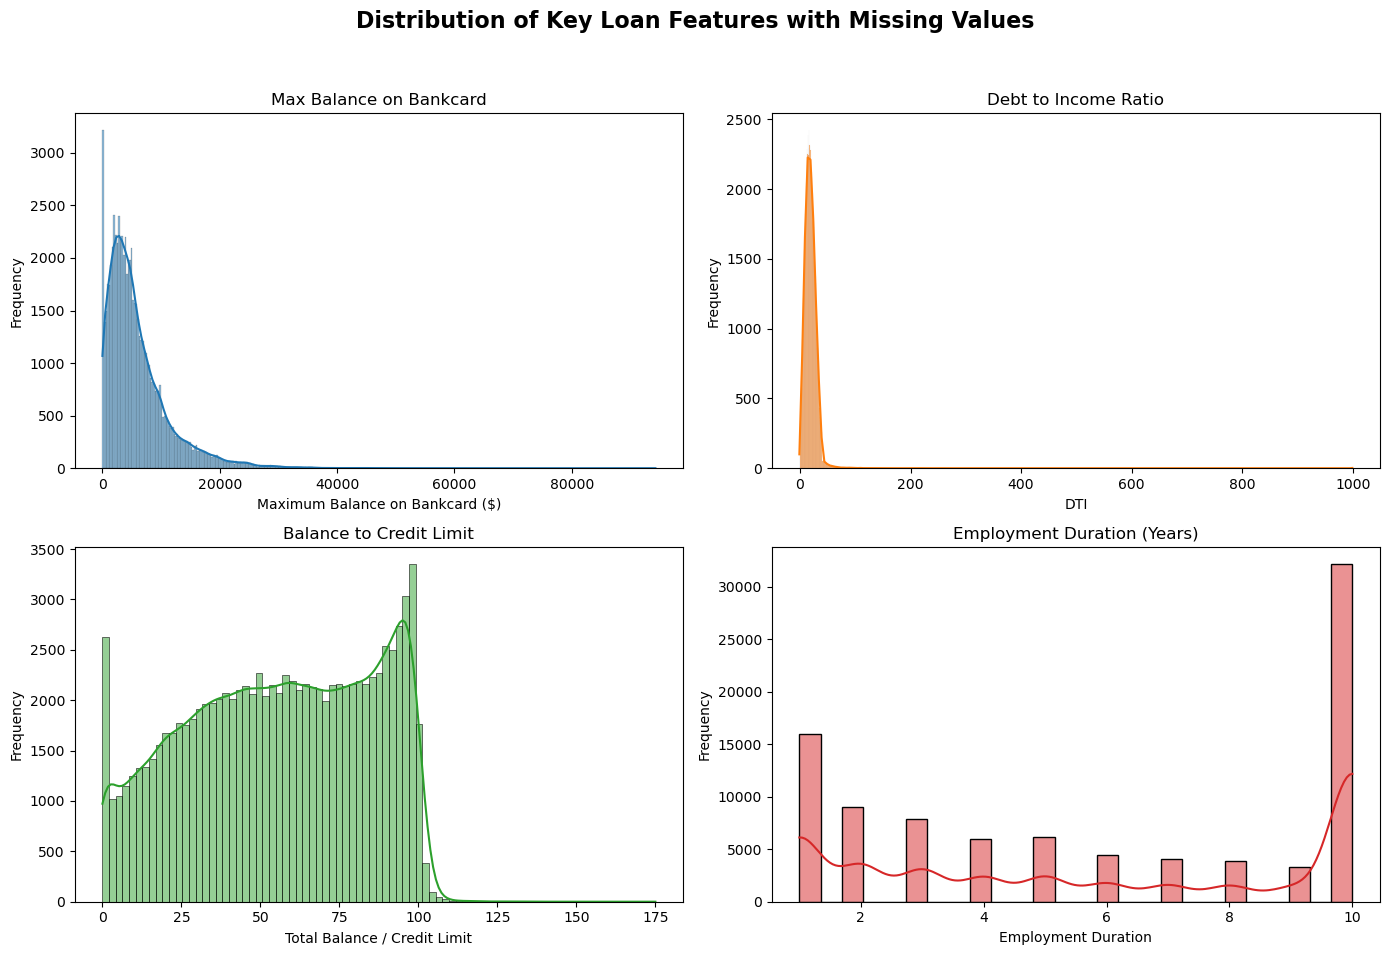

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

#Function to plot the histograms of variables with null entry
def distribution_plot(data, xlabel="Variable", ylabel="Count", title="Distribution Plot", color="#4C72B0"):  
    plt.figure(figsize=(10, 6)) 
    sns.set_style("whitegrid")  
    sns.histplot(data.dropna(), kde=True, color="red")
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()



# Create figure and axes
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Distribution of Key Loan Features with Missing Values", fontsize=16, fontweight='bold')

# Plot 1: max_bal_bc
sns.histplot(df_clean['max_bal_bc'].dropna(), kde=True, ax=axs[0, 0], color="#1f77b4", edgecolor='black')
axs[0, 0].set_title("Max Balance on Bankcard")
axs[0, 0].set_xlabel("Maximum Balance on Bankcard ($)")
axs[0, 0].set_ylabel("Frequency")

# Plot 2: dti
sns.histplot(df_clean['dti'].dropna(), kde=True, ax=axs[0, 1], color="#ff7f0e", edgecolor='black')
axs[0, 1].set_title("Debt to Income Ratio")
axs[0, 1].set_xlabel("DTI")
axs[0, 1].set_ylabel("Frequency")

# Plot 3: bc_util
sns.histplot(df_clean['bc_util'].dropna(), kde=True, ax=axs[1, 0], color="#2ca02c", edgecolor='black')
axs[1, 0].set_title("Balance to Credit Limit")
axs[1, 0].set_xlabel("Total Balance / Credit Limit")
axs[1, 0].set_ylabel("Frequency")

# Plot 4: emp_length_numeric
sns.histplot(df_clean['emp_length_numeric'].dropna(), kde=True, ax=axs[1, 1], color="#d62728", edgecolor='black')
axs[1, 1].set_title("Employment Duration (Years)")
axs[1, 1].set_xlabel("Employment Duration")
axs[1, 1].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Inference from distribution**: Imputing missing values with the *mean or median* can lead to bias, particularly in cases where the *number of missing entries surpasses the mode or most frequent value*, and the data is highly sensitive to these features. To prevent distortion in the analysis, we opt to remove the rows with missing values. This strategy is appropriate since the number of missing entries remains relatively small in the context of the complete dataset, which contains 100,000 records. 

In [164]:
df_clean = df_clean.drop(['max_bal_bc', 'emp_length_numeric'], axis = 1) 

In [165]:
df_clean = df_clean.dropna(subset=['bc_util', 'dti'])

#Check the columns with NaN
columns_with_nan = df_clean.columns[df_clean.isna().any()].tolist()
empty_columns = df_clean.columns[df_clean.isna().all()].tolist()

print("Columns with NaN:", columns_with_nan)
print("Completely Empty Columns:", empty_columns)

Columns with NaN: []
Completely Empty Columns: []


**Now we are clear with empty entries.**

**5. Select the categorical and numerical variable from the lending dataset**

In [168]:
# Separate object type (categorical/string) columns
df_object = df_clean.select_dtypes(include=['object'])

# Separate float type (numerical) columns
df_float = df_clean.select_dtypes(include=['float64'])

# Check results
print("---------------------------------------")
print("Object columns:\n", df_object.columns)
print("---------------------------------------")
print("Float columns:\n", df_float.columns)


---------------------------------------
Object columns:
 Index(['home_ownership', 'verification_status', 'application_type',
       'loan_status', 'purpose', 'grade'],
      dtype='object')
---------------------------------------
Float columns:
 Index(['fico_range_high', 'fico_range_low', 'pub_rec_bankruptcies',
       'annual_inc', 'dti', 'loan_amnt', 'installment', 'total_acc',
       'open_acc', 'bc_util', 'term_numeric', 'int_rate_numeric'],
      dtype='object')


**6. Descriptive statistics of the numeric columns**

In [170]:
# Descriptive statistics of the numeric columns
print("\nDescriptive Statistics:")
df_clean.describe().apply(lambda x: x.apply('{0:.2f}'.format))


Descriptive Statistics:


,fico_range_high,fico_range_low,pub_rec_bankruptcies,annual_inc,dti,loan_amnt,installment,total_acc,open_acc,bc_util,term_numeric,int_rate_numeric
count,96999.00,96999.00,96999.00,96999.00,96999.00,96999.00,96999.00,96999.00,96999.00,96999.00,96999.00,96999.00
mean,704.40,700.40,0.13,80421.66,19.44,15432.75,454.63,24.13,11.79,55.84,43.14,12.53
std,33.69,33.69,0.36,87888.18,17.34,9476.46,273.26,12.07,5.76,28.84,10.97,4.87
min,664.00,660.00,0.00,0.00,-1.00,1000.00,30.12,2.00,1.00,0.00,36.00,5.00
25%,679.00,675.00,0.00,48000.00,12.15,8000.00,256.04,15.00,8.00,32.70,36.00,9.00
50%,699.00,695.00,0.00,67000.00,18.20,13200.00,383.00,22.00,11.00,57.30,36.00,12.00
75%,724.00,720.00,0.00,95500.00,25.01,20275.00,607.19,31.00,15.00,81.20,60.00,16.00
max,850.00,845.00,7.00,10999200.00,999.00,40000.00,1719.83,115.00,86.00,175.00,60.00,30.00


**7. Save the cleaned dataset in the `.csv` format**

In [172]:
filename = "cleaned_lending_dataset.csv"

df_clean.to_csv(filename, index=False)

print(f"DataFrame saved to '{filename}'")
print("-----------------------------------")
print(f"Cleaned datasets is saved!")

DataFrame saved to 'cleaned_lending_dataset.csv'
-----------------------------------
Cleaned datasets is saved!


### Summary:

We have saved the cleaned dataset in `.csv` format. This file will serve as our reference for future exploratory data analysis and model development tasks.